<a href="https://colab.research.google.com/github/12vikas12/Apex-Planet-Internship/blob/main/vtu23125_task_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


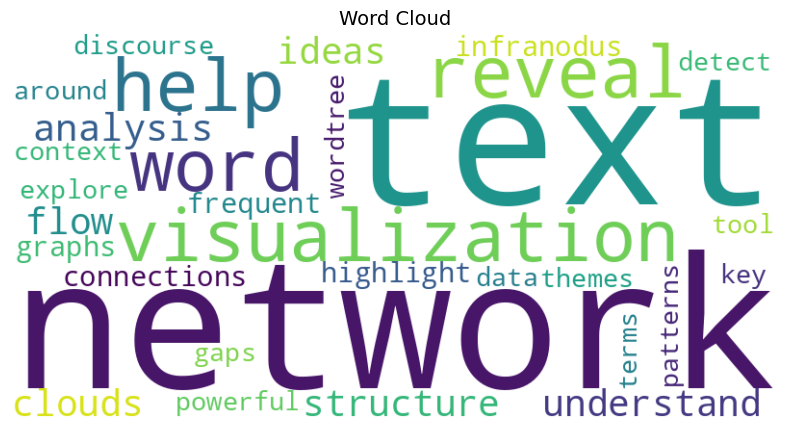

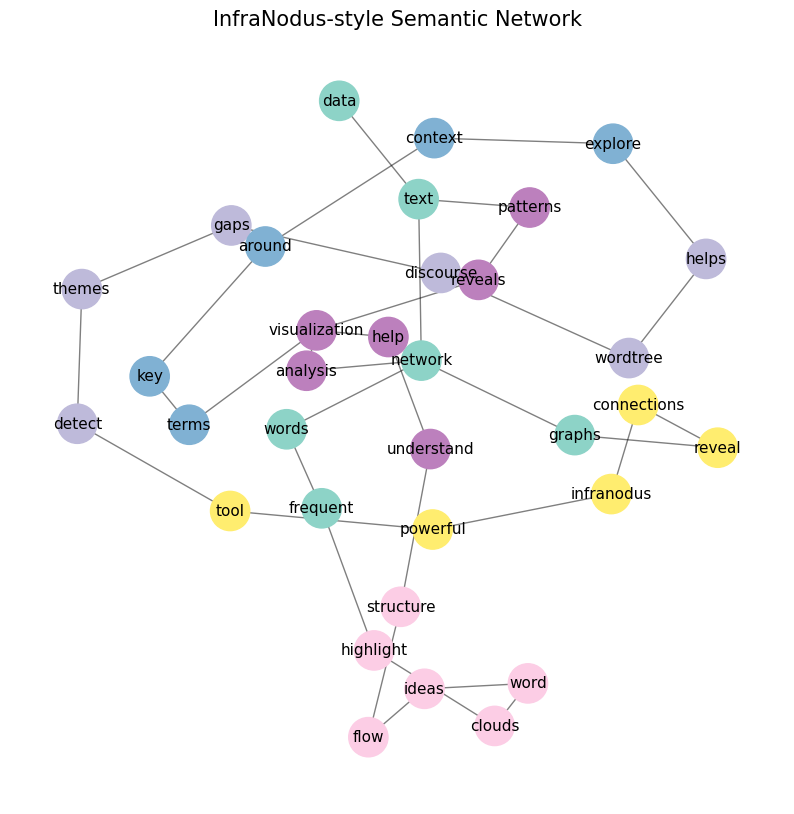

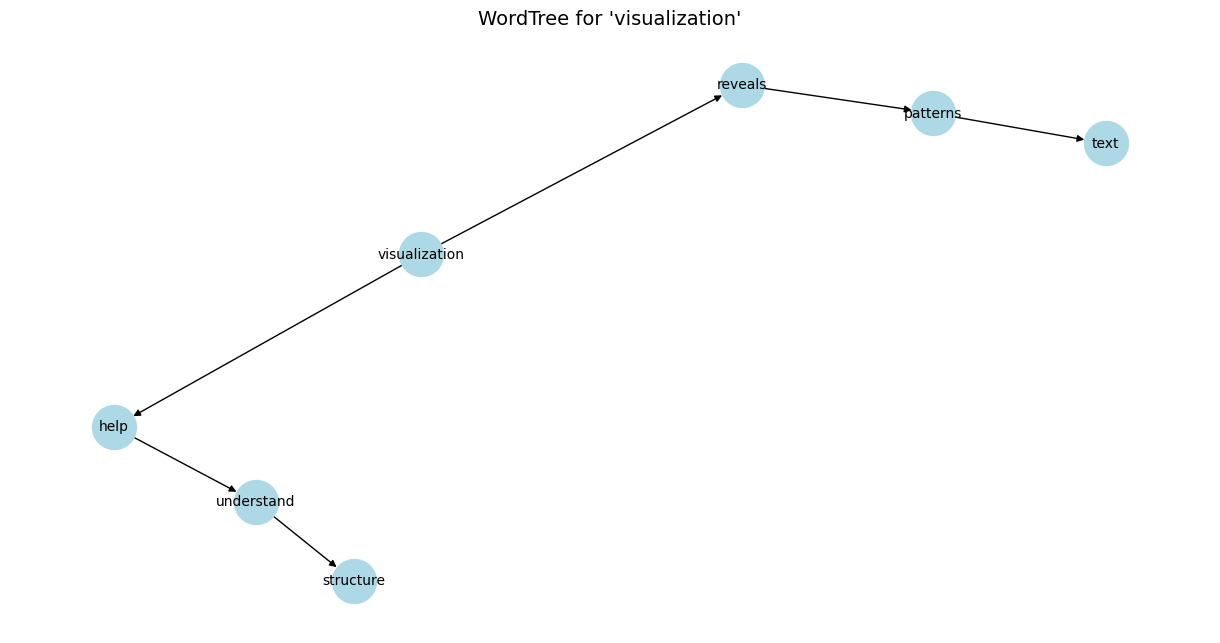


Concordance lines for 'network':

... text network analysis visualization help understand structure ...
... word clouds highlight frequent words network graphs reveal connections infranodus powerful ...


In [2]:
# ===============================================
# TEXT NETWORK + WORDTREE + INFRANODUS STYLE ANALYSIS
# ===============================================

# Install necessary libraries
!pip install wordcloud networkx matplotlib nltk python-louvain

# Import libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import networkx as nx
from collections import defaultdict
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
# Import best_partition directly
from community.community_louvain import best_partition
from itertools import islice

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Download the missing resource
text = """
Text network analysis and visualization help understand the structure and flow of ideas.
Word clouds highlight frequent words, while network graphs reveal connections.
InfraNodus is a powerful tool to detect themes and gaps in discourse.
WordTree helps explore the context around key terms. Visualization reveals patterns in text data.
"""
stop_words = set(stopwords.words('english'))
tokens = word_tokenize(text.lower())
tokens = [t for t in tokens if t.isalpha() and t not in stop_words]
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tokens))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud", fontsize=14)
plt.show()
window_size = 2
co_occurrences = defaultdict(int)

for i in range(len(tokens) - window_size + 1):
    window = tokens[i:i+window_size]
    for j in range(len(window)):
        for k in range(j+1, len(window)):
            pair = tuple(sorted([window[j], window[k]]))
            co_occurrences[pair] += 1

G = nx.Graph()
for (w1, w2), weight in co_occurrences.items():
    G.add_edge(w1, w2, weight=weight)


partition = best_partition(G)  # Use best_partition directly
pos = nx.spring_layout(G, k=0.5, seed=42)
weights = [G[u][v]['weight'] for u,v in G.edges()]

plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(G, pos, node_size=800,
                       cmap=plt.cm.Set3, node_color=[partition[node] for node in G.nodes()])
nx.draw_networkx_edges(G, pos, width=[w for w in weights], alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=11)
plt.title("InfraNodus-style Semantic Network", fontsize=15)
plt.axis('off')
plt.show()

from collections import defaultdict

def build_wordtree(tokens, root_word, depth=3):
    tree = defaultdict(list)
    for i, token in enumerate(tokens):
        if token == root_word:
            next_tokens = list(islice(tokens, i+1, i+1+depth))
            if next_tokens:
                tree[root_word].append(next_tokens)
    return tree

def plot_wordtree(tree, root_word):
    G_tree = nx.DiGraph()
    for phrase_list in tree[root_word]:
        parent = root_word
        for w in phrase_list:
            G_tree.add_edge(parent, w)
            parent = w

    plt.figure(figsize=(12,6))
    # Use spring_layout as an alternative to graphviz_layout
    pos = nx.spring_layout(G_tree)
    nx.draw(G_tree, pos, with_labels=True, node_color='lightblue',
            node_size=1000, font_size=10, arrows=True)
    plt.title(f"WordTree for '{root_word}'", fontsize=14)
    plt.show()

# Example WordTree
chosen_word = "visualization"
tree = build_wordtree(tokens, chosen_word, depth=3)
if tree:
    plot_wordtree(tree, chosen_word)
else:
    print(f"No occurrences of '{chosen_word}' found in text.")

# -----------------------------
# 5️⃣ SIMPLE CONCORDANCE (Text Context)
# -----------------------------
chosen_word = 'network'
window_context = 5

print(f"\nConcordance lines for '{chosen_word}':\n")
for i, token in enumerate(tokens):
    if token == chosen_word:
        start = max(0, i - window_context)
        end = min(len(tokens), i + window_context + 1)
        context = tokens[start:end]
        print('... ' + ' '.join(context) + ' ...')